#  Plot comparisons

* Should start to adopt postopus
* Time and N iterations 
* ~Rel density and total density

In [11]:
import itertools
%load_ext autoreload
%autoreload 2

import numpy as np
import enum
import matplotlib.pyplot as plt

from oct_utils import ConvergenceData, parse_profiling



# For timings, either want 
# Walltime:  08.244s from std.out 
# or
# COMPLETE_RUN from profiling/time.000000

# conv_no_pre = ConvergenceData(f'no_preconditioning/{file}')
# conv_pre = ConvergenceData(f'preconditioning/{file}')
# data_no_pre = np.column_stack((conv_no_pre.get('iter'), conv_no_pre.get('rel_dens')))
# data_pre = np.column_stack((conv_pre.get('iter'), conv_pre.get('rel_dens')))

files = ['1ALA_broyden']


def initialise_subplot(n_rows: int, n_cols: int):
    # Plot settings
    # n_rows = math.ceil(len(system_names) / n_cols)
    assert n_rows > 0, "Must have at least one row"
    assert n_cols > 0, "Must have at least one column"

    # Calculate the aspect ratio of standard A4
    aspect_ratio = 297.0 / 210.0

    # Calculate the width of the figure in inches
    fig_width = 8.3  # A4 width in inches (approx)

    # Calculate the height of the figure in inches to maintain aspect ratio
    fig_height = fig_width / aspect_ratio * (n_rows / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    fig.set_tight_layout(True)
    return fig, axs
    
    
# TODO(Alex) Do subplots, exactly how I did with xTB project. 

# def plot_convergence(files, ):
#     nrows =1
#     # Plot histogram next to 
#     ncols = 2
#     fig, axes = plt.subplots(nrows, ncols)
#     
#     # line_width = 2
#     # marker_size = 7
#     # label_size = 14
#     # font_size = 14
#     # leg_font_size = 14
#     
#     plt.yscale('log')
#     
#     # Initialise counters
#     empty_lims = 0, 0
#     i_cmp = -1
#     
#     for i, j in itertools.product(range(nrows), range(ncols)):
#         i_cmp += 1
#         file = files[i_cmp]
#         
#         no_pre = ConvergenceData(f'no_preconditioning/{file}')
#         pre = ConvergenceData(f'preconditioning/{file}')
#             
#         plt.plot(no_pre.data[:, 0], no_pre.data[:, 4], label='No Preconditioner')
#         plt.plot(pre.data[:, 0], pre.data[:, 4], label='Preconditioner')
#         plt.legend()
# 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


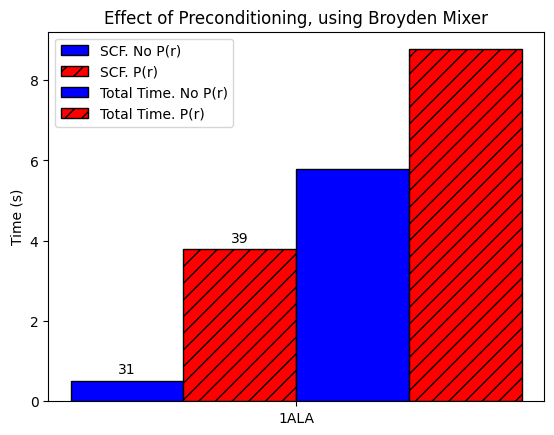

In [19]:
""" Note, it would be worth absorbing these into workflows, which work with Postopus
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from typing import List

from oct_utils import parse_profiling, ConvergenceData


def bar_chart_data_single_field(files, field1: str, field2: str):
    """
    Return a single data field, for all systems
    :param files: 
    :return: 
    """
    values = []
    for file in files:
        data = parse_profiling(file)
        values.append(data['cumulative'][field1][field2])
    return values


def number_of_scf_iterations(files) -> List[int]:
    """ Wrapper util
    :param files: 
    :return: 
    """
    n_scf = []
    for file in files:
        convergence = ConvergenceData(file)
        n_scf.append(convergence.n_scf_iterations())
    return n_scf
    

def bar_plot(systems: List[str], fields: List[dict], width = 0.27, bar_labels=None, title=''):
    """ Plot several bar plots (one per field) for each system
    
    Adapted from this reference:
    https://stackoverflow.com/questions/14270391/how-to-plot-multiple-bars-grouped
    
    :param systems: 
    :param fields: 
    :param width: 
    :return: 
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_dummy = np.arange(len(systems))  # the x locations for the systems
    ax.set_title(title)
    
    plots = []
    field_labels = []
    for i, field in enumerate(fields):
        data = field.pop('data')
        label = field.pop('label')
        # Plot a bar chart for single field, for all systems
        plot = ax.bar(x_dummy + (i * width), data, width, **field)
        plots.append(plot)
        field_labels.append(label)

    ax.set_ylabel('Time (s)')
    ax.set_xticks(x_dummy + ((len(fields) - 1) * 0.5 * width))
    ax.set_xticklabels(systems)
    ax.legend(plots, field_labels)

    if bar_labels is None:
        return
    
    # Add N SCF iterations as labels. Want plots 0 and 1
    for labels_for_field in bar_labels:
        ifield = labels_for_field['field']
        labels = labels_for_field['labels']
        assert len(labels) == len(systems)
        # For a given field, loop over each bar of the plot
        # i.e iterate over all systems contributing data to this field
        for i, bar in enumerate(plots[ifield]):
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, labels[i], ha='center', va='bottom')


# SCF Time - no preconditioner
files = ['no_preconditioning/1ALA_broyden']
scf_no_pre_values = bar_chart_data_single_field(files, 'SCF_CYCLE', 'TOTAL_TIME')
# Total time - no preconditioner
total_no_pre_values = bar_chart_data_single_field(files, 'COMPLETE_RUN', 'TOTAL_TIME')
# Number of SCF iterations
nscf_no_pre = number_of_scf_iterations(files)

# SCF Time - Preconditioner
files = ['preconditioning/1ALA_broyden']
scf_pre_values = bar_chart_data_single_field(files, 'SCF_CYCLE', 'TOTAL_TIME')
# Total time - Preconditioner
total_pre_values = bar_chart_data_single_field(files, 'COMPLETE_RUN', 'TOTAL_TIME')
# Number of SCF iterations
nscf_pre = number_of_scf_iterations(files)


fields = [{'data': scf_no_pre_values, 'label': 'SCF. No P(r)', 'color': 'b', 'hatch': '', 'edgecolor': 'black'},
          {'data': scf_pre_values, 'label': 'SCF. P(r)', 'color': 'r', 'hatch': '//', 'edgecolor': 'black'},
          {'data': total_no_pre_values, 'label': 'Total Time. No P(r)', 'color': 'b', 'hatch': '', 'edgecolor': 'black'},
          {'data': total_pre_values, 'label': 'Total Time. P(r)', 'color': 'r', 'hatch': '//', 'edgecolor': 'black'}]


# Apply labels to bars, for the SCF fields
# where the field index is defined by the order in fields, above
bar_labels = [{'field': 0, 'labels': nscf_no_pre}, {'field': 1, 'labels': nscf_pre}]

systems = ['1ALA']
title = 'Effect of Preconditioning using the Broyden Mixer'
bar_plot(systems, fields, bar_labels=bar_labels, title=title)




In [47]:
""" Timings in Table Form

More stats of interest:
* | N SCF steps with P(r) | Converged with P(r) | N SCF steps without P(r) | Converged w/o P(r)
"""
import numpy as np
import pandas as pd

# 'cumulative' or 'self'
time_type = 'cumulative'
# Subdirectory names for calculations
systems = ['1ALA_broyden']

# Create List[dict] for pandas
entries = []
stats = {'scf w': [], 'scf w/o': []}

for system in systems:
    system_name, mixer = system.split('_')
    data_to_visualise = {'System': system_name, 'Mixer': mixer}
    
    data_no_pre = parse_profiling(f'no_preconditioning/{system}')[time_type]
    data_pre = parse_profiling(f'preconditioning/{system}')[time_type]
    
    # TODO(Alex) Add n-atoms
    data_to_visualise.update({'SCF time w/o P(r)':   data_no_pre['SCF_CYCLE']['TOTAL_TIME'],
                              'SCF time w P(r)':      data_pre['SCF_CYCLE']['TOTAL_TIME'],
                              'Total time w/o P(r)': data_no_pre['COMPLETE_RUN']['TOTAL_TIME'],
                              'Total time w P(r)':    data_pre['COMPLETE_RUN']['TOTAL_TIME'],
                              'SCF Faster with P(r)?': data_no_pre['SCF_CYCLE']['TOTAL_TIME'] > data_pre['SCF_CYCLE']['TOTAL_TIME']}
                             )
    entries.append(data_to_visualise)
    
    # Collect some data for stats
    stats['scf w/o'].append(data_no_pre['SCF_CYCLE']['TOTAL_TIME'])
    stats['scf w'].append(data_pre['SCF_CYCLE']['TOTAL_TIME'])

pd.set_option('display.width', 120)  # Set the overall display width w.r.t. n_characters
df = pd.DataFrame(entries)
print(df)
print()

# Compute some stats
print('Summary')
print('--------------')

n_entries = len(df)
speed_up = np.empty(shape=n_entries)
for i in range(n_entries):
    speed_up[i] = stats['scf w/o'][i] / stats['scf w'][i]

# Percentage that are slower, and by how much
slower = speed_up[speed_up < 1.]
if len(slower) == 0:
    print(f'{len(slower)} / {n_entries} have slower SCF time')
else:
    print(f'{len(slower)} / {n_entries} have slower SCF time, by an average of {np.mean(1. / slower)} x')

# Percentage that are faster, and by how much
faster = speed_up[speed_up >= 1.]
if len(faster) == 0:
    print(f'{len(faster)} / {n_entries} have faster SCF time')
else:
    print(f'{len(faster)} / {n_entries} have faster SCF time, by an average of {np.mean(faster)} x')





  System    Mixer  SCF time w/o P(r)  SCF time w P(r)  Total time w/o P(r)  Total time w P(r)  SCF Faster with P(r)?
0   1ALA  broyden           0.509039         3.794614             5.794115           8.767568                  False

Summary
--------------
1 / 1 have slower SCF time, by an average of 7.4544661607460325 x
0 / 1 have faster SCF time
